In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

In [3]:
i=1
data = pd.read_csv('/content/gdrive/MyDrive/EMG/Sessions/Session{}.csv'.format(i))
auth = []
for i in range(len(data)):
  if data.iloc[i]['Participant'] < 40:
    auth.append(1)
  else:
    auth.append(0)

In [4]:
X_dat = data.drop(['Gesture','Participant','Trial'], axis = 1)
# X_dat

scaler = StandardScaler()
X_dat = scaler.fit_transform(X_dat)
X_dat1 = pd.DataFrame(X_dat)
X_dat1['auth'] = auth

print(X_dat1['auth'].value_counts())

X = X_dat1.iloc[0:,:-1]
y = X_dat1.iloc[0:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(y.value_counts())

sequence_length = 33
batch_size = 33
X_batches = []
y_batches = []

for i in range(0, len(X) - sequence_length + 1, batch_size):
    X_batch = X.iloc[i:i+sequence_length]
    y_batch = y.iloc[i]

    X_batches.append(X_batch)
    y_batches.append(y_batch)

y_batches = np.array(y_batches)
y_batches = to_categorical(y_batches)
X_batches = np.array(X_batches)

X_train, X_test, y_train, y_test = train_test_split(X_batches, y_batches, test_size=0.3, random_state = 42, stratify = y_batches)

model = Sequential()
model.add(LSTM(64, input_shape=(33, 168),activation="sigmoid",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

report = classification_report(y_test, y_pred)
print(report)

1    153153
0     15708
Name: auth, dtype: int64
1    153153
0    153153
Name: auth, dtype: int64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 33, 64)            59648     
                                                                 
 dropout (Dropout)           (None, 33, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 72130 (281.76 KB)
Trainable params: 72130 (281.76 KB)
Non-trainable params: 

In [5]:
i=2
data = pd.read_csv('/content/gdrive/MyDrive/EMG/Sessions/Session{}.csv'.format(i))

X_dat = data.drop(['Gesture','Participant','Trial'], axis = 1)
# X_dat

scaler = StandardScaler()
X_dat = scaler.fit_transform(X_dat)
X_dat1 = pd.DataFrame(X_dat)
X_dat1['auth'] = auth

print(X_dat1['auth'].value_counts())

X = X_dat1.iloc[0:,:-1]
y = X_dat1.iloc[0:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(y.value_counts())

sequence_length = 33
batch_size = 33
X_batches = []
y_batches = []

for i in range(0, len(X) - sequence_length + 1, batch_size):
    X_batch = X.iloc[i:i+sequence_length]
    y_batch = y.iloc[i]

    X_batches.append(X_batch)
    y_batches.append(y_batch)

y_batches = np.array(y_batches)
y_batches = to_categorical(y_batches)
X_batches = np.array(X_batches)

X_train, X_test, y_train, y_test = train_test_split(X_batches, y_batches, test_size=0.3, random_state = 42, stratify = y_batches)

model = Sequential()
model.add(LSTM(64, input_shape=(33, 168),activation="sigmoid",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

report = classification_report(y_test, y_pred)
print(report)

1    153153
0     15708
Name: auth, dtype: int64
1    153153
0    153153
Name: auth, dtype: int64
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 33, 64)            59648     
                                                                 
 dropout_2 (Dropout)         (None, 33, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 72130 (281.76 KB)
Trainable params: 72130 (281.76 KB)
Non-trainable params

In [6]:
i=3
data = pd.read_csv('/content/gdrive/MyDrive/EMG/Sessions/Session{}.csv'.format(i))

X_dat = data.drop(['Gesture','Participant','Trial'], axis = 1)
# X_dat

scaler = StandardScaler()
X_dat = scaler.fit_transform(X_dat)
X_dat1 = pd.DataFrame(X_dat)
X_dat1['auth'] = auth

print(X_dat1['auth'].value_counts())

X = X_dat1.iloc[0:,:-1]
y = X_dat1.iloc[0:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(y.value_counts())

sequence_length = 33
batch_size = 33
X_batches = []
y_batches = []

for i in range(0, len(X) - sequence_length + 1, batch_size):
    X_batch = X.iloc[i:i+sequence_length]
    y_batch = y.iloc[i]

    X_batches.append(X_batch)
    y_batches.append(y_batch)

y_batches = np.array(y_batches)
y_batches = to_categorical(y_batches)
X_batches = np.array(X_batches)

X_train, X_test, y_train, y_test = train_test_split(X_batches, y_batches, test_size=0.3, random_state = 42, stratify = y_batches)

model = Sequential()
model.add(LSTM(64, input_shape=(33, 168),activation="sigmoid",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

history3 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

report = classification_report(y_test, y_pred)
print(report)

1    153153
0     15708
Name: auth, dtype: int64
1    153153
0    153153
Name: auth, dtype: int64
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 33, 64)            59648     
                                                                 
 dropout_4 (Dropout)         (None, 33, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 72130 (281.76 KB)
Trainable params: 72130 (281.76 KB)
Non-trainable params

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_loss_and_accuracy(history, session_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{session_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{session_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.show()


def plot_confusion_matrix(model, X_test, y_test, session_name):
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(true_classes, y_pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(43), yticklabels=range(43))
    plt.title(f'{session_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



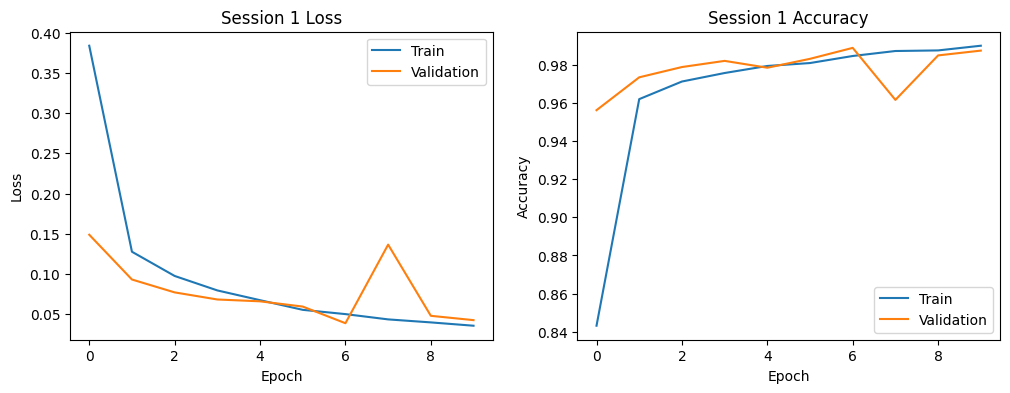

In [8]:
plot_loss_and_accuracy(history1, 'Session 1')

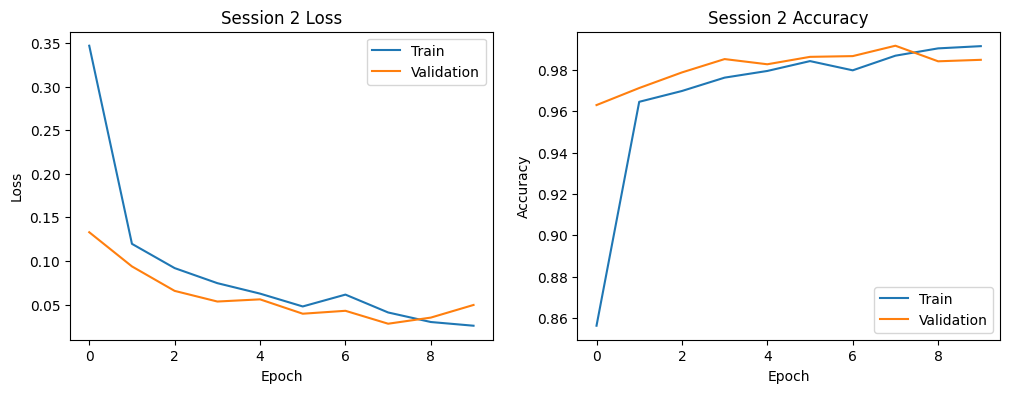

In [9]:
plot_loss_and_accuracy(history2, 'Session 2')

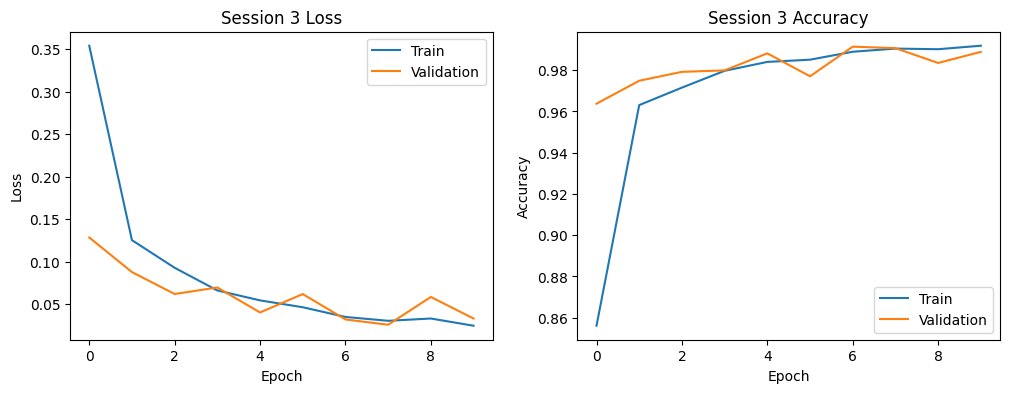

In [10]:
plot_loss_and_accuracy(history3, 'Session 3')

In [11]:
import pickle
with open('/content/gdrive/MyDrive/EMG/Sessions/training_history1.pkl', 'wb') as file:
    pickle.dump(history1.history, file)

In [12]:
with open('/content/gdrive/MyDrive/EMG/Sessions/training_history2.pkl', 'wb') as file:
    pickle.dump(history2.history, file)

In [13]:
with open('/content/gdrive/MyDrive/EMG/Sessions/training_history3.pkl', 'wb') as file:
    pickle.dump(history3.history, file)

In [14]:
data = pd.read_csv('/content/gdrive/MyDrive/EMG/Sessions/data.csv', index_col=None)
data = data.iloc[0:,1:]
data

,Participant,Gesture,Trial,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F2_1,...,W11_3,W11_4,W11_5,W11_6,W12_1,W12_2,W12_3,W12_4,W12_5,W12_6
0,1,1,1,3.110324,2.841973,1.908858,2.014165,1.602503,0.993396,3.452033,...,1.883277,1.710328,1.223964,0.933255,2.734054,2.080262,1.618242,1.486598,0.688730,0.401528
1,1,1,1,2.816928,2.795840,2.235993,2.080250,1.588518,1.147142,3.272871,...,2.151844,1.590148,0.935341,0.918269,2.492258,2.190547,1.657349,1.442303,0.798592,0.312742
2,1,1,1,2.935225,2.984728,2.074351,2.136033,1.704614,0.938229,3.339320,...,1.710746,1.465138,1.348585,0.754941,2.562364,2.049576,1.288337,1.101940,0.824831,0.476688
3,1,1,1,2.786248,2.782894,1.923398,1.774108,1.374999,0.828680,3.003595,...,1.721995,1.540449,1.023915,0.587505,2.241784,1.872230,1.369887,1.054012,0.754820,0.490641
4,1,1,1,2.919923,2.854799,2.004705,1.777750,1.382135,0.941564,2.943566,...,1.696632,1.335274,1.117872,0.924680,2.244467,2.037483,1.598419,1.211382,0.768694,0.286040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506578,43,17,7,0.812796,0.604894,0.231534,-0.033714,-0.392463,-0.241018,0.863309,...,-0.276385,-0.355168,-0.624937,-0.648431,0.047001,-0.429415,-0.569393,-0.648947,-0.302875,-0.578749
506579,43,17,7,0.750069,0.463989,-0.126063,0.194238,-0.322757,-0.441085,0.888483,...,-0.180996,-0.311693,-0.617969,-0.504192,-0.208846,-0.601226,-0.382320,-0.266253,-0.547549,-0.724474
506580,43,17,7,0.714008,0.495410,-0.012148,-0.378108,-0.558836,-0.493587,0.723785,...,0.070226,-0.646256,-0.787723,-0.747326,-0.075607,-0.628737,-0.470198,-0.446804,-0.756589,-0.588274
506581,43,17,7,0.956979,0.482989,-0.107040,-0.476641,-0.144407,-0.547442,0.865098,...,-0.270089,-0.406885,-0.513570,-0.929760,0.247558,-0.342913,-0.443959,-0.536360,-0.487448,-0.622051


In [15]:
auth = []
for i in range(len(data)):
  if data.iloc[i]['Participant'] < 40:
    auth.append(1)
  else:
    auth.append(0)

In [16]:
X_dat = data.drop(['Gesture','Participant','Trial'], axis = 1)
# X_dat

scaler = StandardScaler()
X_dat = scaler.fit_transform(X_dat)
X_dat1 = pd.DataFrame(X_dat)
X_dat1['auth'] = auth

print(X_dat1['auth'].value_counts())

X = X_dat1.iloc[0:,:-1]
y = X_dat1.iloc[0:,-1]

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(y.value_counts())

sequence_length = 33
batch_size = 33
X_batches = []
y_batches = []

for i in range(0, len(X) - sequence_length + 1, batch_size):
    X_batch = X.iloc[i:i+sequence_length]
    y_batch = y.iloc[i]

    X_batches.append(X_batch)
    y_batches.append(y_batch)

y_batches = np.array(y_batches)
y_batches = to_categorical(y_batches)
X_batches = np.array(X_batches)

X_train, X_test, y_train, y_test = train_test_split(X_batches, y_batches, test_size=0.3, random_state = 42, stratify = y_batches)

model = Sequential()
model.add(LSTM(64, input_shape=(33, 168),activation="sigmoid",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

report = classification_report(y_test, y_pred)
print(report)

1    459459
0     47124
Name: auth, dtype: int64
1    459459
0    459459
Name: auth, dtype: int64
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 33, 64)            59648     
                                                                 
 dropout_6 (Dropout)         (None, 33, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 72130 (281.76 KB)
Trainable params: 72130 (281.76 KB)
Non-trainable params

In [17]:
with open('/content/gdrive/MyDrive/EMG/Sessions/final.pkl', 'wb') as file:
    pickle.dump(history.history, file)